# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
unique_labels = np.unique(y_train)
n_classes = len(unique_labels)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

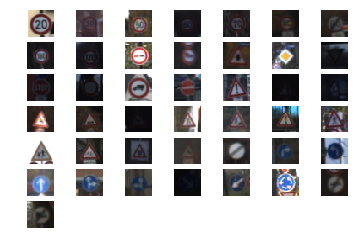

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Show an example of each class
i = 1
for label in unique_labels:
        # Pick the first image for each label.
        index = np.where(y_train == label)[0][0]
        image = X_train[index]
        plt.subplot(7, 7, i)
        plt.axis('off')
        i += 1
        _ = plt.imshow(image)
        
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

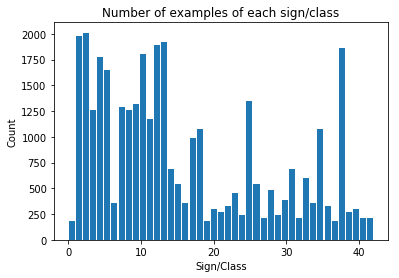

In [5]:
# Let's check the distribution of training data in terms of classes

x= np.arange(0,n_classes)
plt.hist(y_train, bins=n_classes,rwidth=0.85)
plt.title('Number of examples of each sign/class')
plt.xlabel('Sign/Class')
plt.ylabel('Count')
plt.show()

In [ ]:
from imgaug.imgaug import augmenters as iaa
import imgaug.imgaug as ia

seq = iaa.Sequential([
   iaa.Crop(px=(2,2,2,2)), # crop images from each side by 0 to 2 px (randomly chosen)
   iaa.Add((-10, 10), per_channel=0.5),
   iaa.Multiply((0.8, 1.2), per_channel=0.5),
   iaa.Affine(
           scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}, # scale images to 80-120% of their size, individually per axis
           translate_px={"x": (-2, 2), "y": (2, 2)}, # translate by -16 to +16 pixels (per axis)
           rotate=(-15, 15), # rotate by -45 to +45 degrees
           shear=(-10, 10), # shear by -16 to +16 degrees
           order=ia.ALL, # use any of scikit-image's interpolation methods
           mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
       ),
])
# Desired size of the image per class
new_number_images_per_class = 5000
# Define new X and Y to store values
new_X_train = None
new_y_train = None
# Generating new X and y
if False:
    for index in x: # in every image class
        print('Processing index #{}'.format(index))
        temp_X_real = X_train[y_train == index].copy()
        new_X_matrix = X_train[y_train == index].copy()
        while new_X_matrix.shape[0] < new_number_images_per_class:
            new_X_matrix = np.concatenate((new_X_matrix,seq.augment_images(temp_X_real)))

        if new_X_train is None: # for the first loop
            new_X_train = new_X_matrix.copy()
            new_y_train = np.empty(new_X_matrix.shape[0])
            new_y_train.fill(index)
        else:
            new_X_train = np.concatenate((new_X_train,new_X_matrix))
            new_y_vals = np.empty(new_X_matrix.shape[0])
            new_y_vals.fill(index)
            new_y_train = np.concatenate((new_y_train,new_y_vals))
# Save result to pickle
np.save('X_train',new_X_train)
np.save('y_train',new_y_train)

In [6]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# PRE PROCESSING

def pre_process(img):
    img = np.array(img, dtype=np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = ((img - [128.0]) / 128.0)
    return img.reshape(32,32,1)


def pre_process_CLAHE(img):
    img = np.array(img, dtype=np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    return img.reshape(32,32,1)

# Shuffle training examples
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# # Normalise input (images still in colour)
# X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
# X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))

# X_train = np.array(list(map(pre_process, X_train)))
# X_valid = np.array(list(map(pre_process, X_valid)))
print("Before pre-processing")
print(X_train.shape)

Before pre-processing
(34799, 32, 32, 3)


In [7]:
new_X_train = np.load('X_train.npy')
new_y_train = np.load('y_train.npy')

In [8]:
X_train, y_train = new_X_train.copy(), new_y_train.copy()

In [9]:
X_train = np.array(list(map(pre_process, X_train)))
X_valid = np.array(list(map(pre_process, X_valid)))
X_test = np.array(list(map(pre_process, X_test))) 
# X_train = np.array(list(map(pre_process_CLAHE, X_train)))
# X_valid = np.array(list(map(pre_process_CLAHE, X_valid)))

print("After pre-processing")
print(X_train.shape)

After pre-processing
(229281, 32, 32, 1)


In [10]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
unique_labels = np.unique(y_train)
n_classes = len(unique_labels)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 229281
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


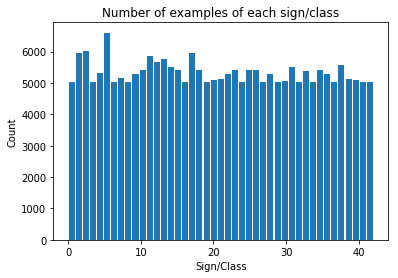

In [11]:
# Let's check the distribution of training data in terms of classes

x= np.arange(0,n_classes)
plt.hist(y_train, bins=n_classes,rwidth=0.85)
plt.title('Number of examples of each sign/class')
plt.xlabel('Sign/Class')
plt.ylabel('Count')
plt.show()

### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [15]:
from tensorflow.contrib.layers import flatten

model_dropout_conv = 0.7
model_dropout_fc = 0.7

# Comvolution Layers size calculations:

# our input layer has a width of W and a height of H
# our convolutional layer has a filter size F
# we have a stride of S
# a padding of P
# and a filter depth of K,
# The following formula gives us the width and height
# new_height = (input_height - filter_height + 2 * P)/S + 1
# new_width = (input_width - filter_width + 2 * P)/S + 1

# VALID Padding, the output height and width are computed as:
# out_height = ceil(float(in_height - filter_height + 1) / float(strides1))
# out_width = ceil(float(in_width - filter_width + 1) / float(strides[2]))

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma)) #height, width, Input depth, output depth 
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 27x27x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')
    # new_height = (input_height - filter_height)/S + 1
    # new_width = (input_width - filter_width)/S + 1

    # SOLUTION: Layer 2: Convolutional. Input = 27x27x6. Output = 23x23x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 23x23x16. Output = 22x22x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')
    
    # SOULTION: DropOuts    
    conv2 = tf.nn.dropout(conv2, model_dropout_conv)

    # SOLUTION: Flatten. Input = 22x22x16. Output = 7744.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 7744. Output = 1200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(7744, 1200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOULTION: DropOuts
    fc1 = tf.nn.dropout(fc1, model_dropout_conv)

    # SOLUTION: Layer 4: Fully Connected. Input = 1200. Output = 400.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1200, 400), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(400))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 400. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(400, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [16]:
# tf Graph input
tf.reset_default_graph() 
x_unflattened = tf.placeholder("float", [None, 32, 32, 1])
x = x_unflattened

y = tf.placeholder("int32", [None])
one_hot_y = tf.one_hot(y, depth=43, on_value=1., off_value=0., axis=-1)

In [18]:
learning_rate = 0.001
EPOCHS = 60 
BATCH_SIZE = 256
n_train = len(X_train)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
#     saver.save(sess, './Basic_LeNet_model_Original_data_EPOCH_60_Dropout07_Trial18')
    saver.save(sess, './Trial 20')
    print("Model saved")
    
# Print parameters for reference
print("\nParameters:")
print("Learning rate (final): ", learning_rate)
print("Training epochs: ", EPOCHS)
print("Batch size: ", BATCH_SIZE)
print("Dropout (conv): ", model_dropout_conv)
print("Dropout (fc): ", model_dropout_fc)    

Training...

EPOCH 1 ...
Validation Accuracy = 0.855

EPOCH 2 ...
Validation Accuracy = 0.910

EPOCH 3 ...
Validation Accuracy = 0.924

EPOCH 4 ...
Validation Accuracy = 0.929

EPOCH 5 ...
Validation Accuracy = 0.929

EPOCH 6 ...
Validation Accuracy = 0.918

EPOCH 7 ...
Validation Accuracy = 0.935

EPOCH 8 ...
Validation Accuracy = 0.935

EPOCH 9 ...
Validation Accuracy = 0.940

EPOCH 10 ...
Validation Accuracy = 0.941

EPOCH 11 ...
Validation Accuracy = 0.945

EPOCH 12 ...
Validation Accuracy = 0.942

EPOCH 13 ...
Validation Accuracy = 0.938

EPOCH 14 ...
Validation Accuracy = 0.948

EPOCH 15 ...
Validation Accuracy = 0.936

EPOCH 16 ...
Validation Accuracy = 0.941

EPOCH 17 ...
Validation Accuracy = 0.941

EPOCH 18 ...
Validation Accuracy = 0.943

EPOCH 19 ...
Validation Accuracy = 0.937

EPOCH 20 ...
Validation Accuracy = 0.939

EPOCH 21 ...
Validation Accuracy = 0.936

EPOCH 22 ...
Validation Accuracy = 0.952

EPOCH 23 ...
Validation Accuracy = 0.946

EPOCH 24 ...
Validation Accura

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    train_accuracy = evaluate(X_train, y_train)
    valid_accuracy = evaluate(X_valid, y_valid)
    test_accuracy = evaluate(X_test, y_test)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Train Accuracy = 0.998
Validation Accuracy = 0.958
Test Accuracy = 0.933


In [ ]:
# Trial 18 run started at 2:46 PM 3/24/17 --- took 7 hours for 60 EPOCS on my laptop


## Question 1

Describe how you preprocessed the data. Why did you choose that technique?

### Answer:
I normalised the data. I found that normalising the data (as opposed to standardising it) gives the higher validation and training accuracy for a network. This is because it accelerates the convergence of the model to the solution (of accurate classificaion).
Normalization takes the bias out of the equation as some features with larger values may have a strong learning bias associated with them.


## Question 2

Describe how you set up the training, validation and testing data for your model. Optional: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?

### Answer:

#### Describe how you set up the training, validation and testing data for your model:

Training, validation and test data were already separated (downloaded pickled files train.p, valid.p and test.p).

#### how did you generate the data?

I used the IMGAUG library to augment the data. Using IMGAUG following transformations were made - 
    scaled images to 80-120% of their size, individually per axis
    translated by -16 to +16 pixels (per axis)
    rotated by -45 to +45 degrees
    sheared by -16 to +16 degrees
    used any of scikit-image's interpolation methods
    used any of scikit-image's warping modes 

#### Why did you generate the data?

The classes data was unbalanced, could lead to bias to one set of classes v/s others
I shuffled the training data because they were arranged in ascending order by label. If I don't shuffle the training data, the first series of batches will all be the first type of sign followed by the second type and so on. This will distort the learning process.

#### What are the differences in the new dataset (with generated data) from the original dataset?

Each label has almost thrice the number of examples ~ 5k samples

## Question 3

What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) For reference on how to build a deep neural network using TensorFlow, see Deep Neural Network in TensorFlow from the classroom.

### Answer:

I had several trials (~20 trials) before arriving at this final model. I decided to make changes to the Lenet architecture as follows - 

     Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6, Filter shape=(5, 5, 1, 6) and Strides 1.
     Relu Activation.
     Pooling. Input = 28x28x6. Output = 27x27x6. ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], VALID padding.
     Layer 2: Convolutional. Input = 27x27x6. Output = 23x23x16, Filter shape=(5, 5, 6, 16) and Strides 1.
     Relu Activation.
     Pooling. Input = 23x23x16. Output = 22x22x16. ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], VALID padding.
     DropOuts. Keep_prod 0.7
     Flatten. Input = 22x22x16. Output = 7744.
     Layer 3: Fully Connected. Input = 7744. Output = 1200, mu = 0, sigma = 0.1  
     Relu Activation
     DropOuts, Keep_prod 0.7
     Layer 4: Fully Connected. Input = 1200. Output = 400, mu = 0, sigma = 0.1  
     Relu Activation
     Layer 5: Fully Connected. Input = 400. Output = 43, mu = 0, sigma = 0.1  

## Question 4

How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)

### Answer:

    Optimizer: Adam optimizer - Adam optimizer uses moving averages of the parameters.
    It generally performs better than the Gradient Decent Optimizer. 

    Learning rate: 0.001 - I tested a range(0.0001 - 0.01) of values.

    Batch size: 256 - Larger batch size yield faster computation. Processing was done in batches.

    EPOCHS: 60 - Started with 50, algorithm learns very fast after just a few epochs, so 25 is selected.

See more detail on the screen shot below on the Trials.

## Question 5

What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem.

### Answer:

I worked on the basic NN model first from the udacity classroom examples. Once I had more confidence, I switched to the more complex version. A few things I tried are as follow (see the image below tih all the options i explored with the results) - 

    Mutiple layer convolutional network
    Multi Scale 
    CLAHE Histogram equalization
    With agmented data the above were repeated
    Also tweaked a bunch of parameters - dropputs, learning rate, epoch and batch sizes
    Found the bet results with tweaks as explained above in Question 3, with the results - 
        Train Accuracy = 0.998
        Validation Accuracy = 0.958
        Test Accuracy = 0.933


<img src="../files/Lane-Lines-Trails-Data.png">

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [4]:

### Load the images and plot them
import cv2
import numpy as np

# Downloaded 8 images, used gimp to scale and resize
german_test_image = [
           'Lightat100metersv2.png', 
           'SCurvev2.png', 
           'UTurnfortrucksv2.png', 
           'bikev2.png', 
           'frogv2.png', 
           'kidsandbikev2.png', 
           'mergeroadsv2.png', 
           'peoplewalkingv2.png'
          ]

german_test_image_list = []

for image in german_test_image:
    img = cv2.imread('traffic-signs-data/' + image, 1)
    img = cv2.resize(img, (32, 32))
#     img = pre_process(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape(32,32,1)
    german_test_image_list.append(img)

In [5]:
print(len(german_test_image_list))
print(german_test_image_list[0].shape)
print(german_test_image_list[0].min(), german_test_image_list[0].max())
arr = np.array(german_test_image_list)
print(arr.shape)

8
(32, 32, 3)
0 255
(8, 32, 32, 3)


In [8]:
import tensorflow as tf
# Run the prediction
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output = sess.run(tf.argmax(logits, 1), feed_dict={x: german_test_image_list})
    print (output)
  

[30 28 11 13 11 14 24 21]


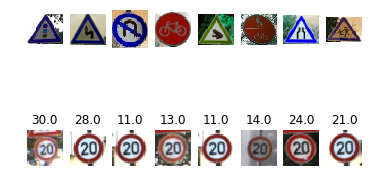

In [110]:
# Plot an example of output
#########
j = 0
for image in german_test_image:
    img = cv2.imread('traffic-signs-data/' + image, 1)
    plt.subplot(2, 8, j+1)
    j += 1
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
for i in range(len(output)):
    for n in range(len(y_train)):
        if y_train[n] == output[i]:
            plt.subplot(2, 8, i+9)
            plt.imshow(new_X_train[n], cmap="gray")
            plt.axis('off')
            plt.title(y_train[n])
            break
            
# print(new_X_train.shape) 
# print(new_y_train.shape) 

#  return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)            

In [111]:
import csv
def getsignnames():
    with open('signnames.csv', mode='r') as infile:
        reader = csv.reader(infile)
        return dict((rows[0], rows[1]) for rows in reader)

In [112]:
print(getsignnames())

{'38': 'Keep right', '15': 'No vehicles', '17': 'No entry', '13': 'Yield', '14': 'Stop', '0': 'Speed limit (20km/h)', '33': 'Turn right ahead', '30': 'Beware of ice/snow', '10': 'No passing for vehicles over 3.5 metric tons', '20': 'Dangerous curve to the right', '25': 'Road work', '21': 'Double curve', '34': 'Turn left ahead', '8': 'Speed limit (120km/h)', '39': 'Keep left', '16': 'Vehicles over 3.5 metric tons prohibited', '35': 'Ahead only', '6': 'End of speed limit (80km/h)', '24': 'Road narrows on the right', '5': 'Speed limit (80km/h)', '32': 'End of all speed and passing limits', '40': 'Roundabout mandatory', '9': 'No passing', '2': 'Speed limit (50km/h)', '31': 'Wild animals crossing', '18': 'General caution', '29': 'Bicycles crossing', '26': 'Traffic signals', '7': 'Speed limit (100km/h)', '1': 'Speed limit (30km/h)', '3': 'Speed limit (60km/h)', 'ClassId': 'SignName', '19': 'Dangerous curve to the left', '22': 'Bumpy road', '12': 'Priority road', '4': 'Speed limit (70km/h)', 


## Question 6

Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook.

### Answer:

The test images i picked from the web performed poorly against the trained model.
The training dataset is German Traffic Signs, but the images I gathered data were from random places. Most of the ones I picked were found missing from the trining set. Additional angles and contrast my have played a factor.



## Question 7

Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?

### Answer:

    See the captured pictures above.
    The images i picked performed poorly.
    The training dataset is German Traffic Signs, but the images I gathered data were from random places. 
    Most of the ones I picked were found missing from the trining set. 
    Additional angles and contrast my have played a factor.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [99]:
# Try tf.nn.top_k
with tf.Session() as sess:
    prediction = tf.nn.softmax(logits)
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output = sess.run(tf.nn.top_k(prediction, 2), feed_dict={x: X_test})
    print (output)

TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00],
       ..., 
       [  9.99087334e-01,   9.12613235e-04],
       [  9.99974012e-01,   1.97452991e-05],
       [  1.00000000e+00,   2.38166945e-15]], dtype=float32), indices=array([[16,  0],
       [ 1,  0],
       [38,  0],
       ..., 
       [12, 32],
       [ 7,  5],
       [10,  5]], dtype=int32))


In [100]:
# Try another way with correct_prediction
with tf.Session() as sess:
    output = {}
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    for i in range(43):
        output[i] = sess.run(correct_prediction, feed_dict={x: X_test[np.where(y_test == i)], 
                                                            y: y_test[np.where(y_test == i)]})

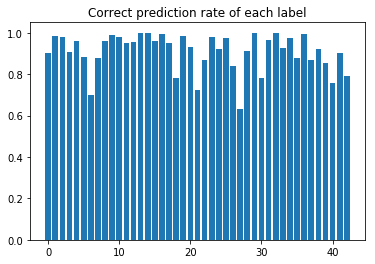

{0: 0.9, 1: 0.9819444444444444, 2: 0.9786666666666667, 3: 0.9066666666666666, 4: 0.9575757575757575, 5: 0.8841269841269841, 6: 0.7, 7: 0.8755555555555555, 8: 0.9622222222222222, 9: 0.9895833333333334, 10: 0.9787878787878788, 11: 0.95, 12: 0.9565217391304348, 13: 0.9986111111111111, 14: 1.0, 15: 0.9619047619047619, 16: 0.9933333333333333, 17: 0.95, 18: 0.782051282051282, 19: 0.9833333333333333, 20: 0.9333333333333333, 21: 0.7222222222222222, 22: 0.8666666666666667, 23: 0.98, 24: 0.9222222222222223, 25: 0.975, 26: 0.8388888888888889, 27: 0.6333333333333333, 28: 0.9133333333333333, 29: 1.0, 30: 0.78, 31: 0.9666666666666667, 32: 1.0, 33: 0.9238095238095239, 34: 0.975, 35: 0.8769230769230769, 36: 0.9916666666666667, 37: 0.8666666666666667, 38: 0.9217391304347826, 39: 0.8555555555555555, 40: 0.7555555555555555, 41: 0.9, 42: 0.7888888888888889}


In [101]:
Correct_rate = {}
for i in range(43):
    Correct_rate[i] = list(output[i]).count(True)/len(list(output[i]))*1.0

plt.bar(range(len(Correct_rate)), Correct_rate.values(), align='center')
plt.title("Correct prediction rate of each label")
plt.show()
print (Correct_rate)

Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
Feel free to use as many code cells as needed.
## Answer
It looks like 6-End of speed limit (80km/h), 18-General caution , 21-Double curve, 27-Double curve 
and 30 -Beware of ice/snow have the lowest accuracy.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [113]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 